In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def get_models(dim_latent):
    generator = nn.Sequential(
        nn.Linear(dim_latent, 512),
        nn.Tanh(),
        nn.Linear(512, 512),
        nn.Tanh(),
        nn.Linear(512, 784),
        nn.Sigmoid(),
        nn.Unflatten(1, (1, 28, 28)),
    )

    discriminator = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784, 512),
        nn.Tanh(),
        nn.Linear(512, 512),
        nn.Tanh(),
        nn.Linear(512, 1),
        nn.Sigmoid(),
    )

    return generator, discriminator

training_data = datasets.MNIST(
    root="/home/secondvoca/sdc_ae_23/data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

dataloader = DataLoader(training_data, batch_size=128, shuffle=True)

In [3]:
def train_gan(generator, discriminator, dim_latent, epochs, criterion, optimizer_g, optimizer_d, g_iter):
    if torch.cuda.is_available():
        cuda_count = torch.cuda.device_count()

        no = 0
        mem_available = 0

        for i in range(cuda_count):
            tmp_available = torch.cuda.mem_get_info(i)[0]
            if mem_available < tmp_available:
                no = i
                mem_available = tmp_available
        device = f"cuda:{no}"
    else:
        device = "cpu"

    print(f"Now, it's working on {device}.")


    generator.to(device)
    discriminator.to(device)

    generator.train()
    discriminator.train()


    for _ in tqdm(range(epochs)):
        for i, (x, y) in enumerate(dataloader):
            batch_size = len(y)
            x = x.to(device)
            
            noise = torch.randn(batch_size, dim_latent, device=device)
            fake_data = generator(noise).detach()

            optimizer_d.zero_grad()
            
            prediction_real = discriminator(x).view(-1)
            error_real = criterion(prediction_real, torch.ones(batch_size, device=device))
            error_real.backward()

            prediction_fake = discriminator(fake_data).view(-1)
            error_fake = criterion(prediction_fake, torch.zeros(batch_size, device=device))
            
            error_fake.backward()
            optimizer_d.step()

            for _ in range(g_iter):
                noise = torch.randn(batch_size, dim_latent, device=device)
                fake_data = generator(noise)

                optimizer_g.zero_grad()
                
                prediction = discriminator(fake_data).view(-1)
                error = criterion(prediction, torch.ones(batch_size, device=device))
                
                error.backward()
                optimizer_g.step()


    generator.to("cpu")
    discriminator.to("cpu")

    generator.eval()
    discriminator.eval()

In [4]:
criterion = nn.BCELoss()

dim_latent = 128

generator, discriminator = get_models(dim_latent)

optimizer_d = torch.optim.Adam(discriminator.parameters())
optimizer_g = torch.optim.Adam(generator.parameters())

In [5]:
train_gan(generator, discriminator, dim_latent, 100, criterion,optimizer_g, optimizer_d, 1)

Now, it's working on cuda:0.


100%|██████████| 100/100 [11:54<00:00,  7.14s/it]


In [6]:
def test_generator(model, dim_latent):
    # z = torch.randn(10, dim_latent, 1, 1)
    z = torch.randn(10, dim_latent)
    with torch.no_grad():
        imgs = model(z)
        print(imgs.shape)
        print(imgs.max().item(), imgs.min().item())
    _, axs = plt.subplots(1, 10, figsize=[20, 4])
    for img, ax in zip(imgs, axs):
        ax.imshow(img.view(28, 28), cmap="gray", vmax=1, vmin=0)
        ax.axis("off")
    plt.tight_layout()

torch.Size([10, 1, 28, 28])
1.0 2.0341828645703275e-38


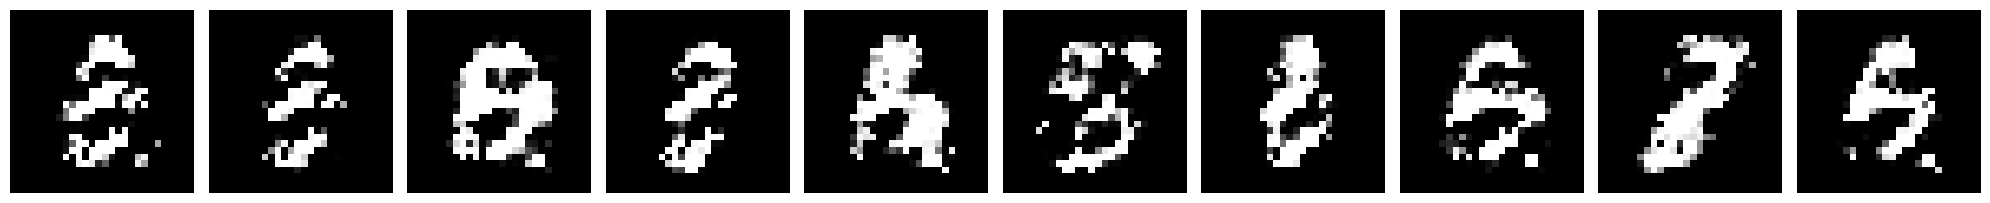

In [7]:
test_generator(generator, dim_latent) # 128 - 100 epochs

torch.Size([10, 1, 28, 28])
1.0 0.0


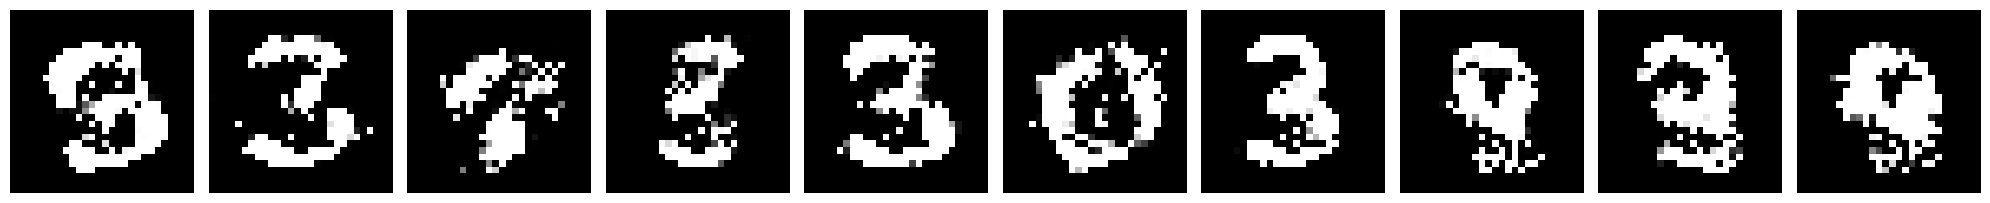

In [147]:
test_generator(generator, dim_latent) # 128 - 100 epochs

torch.Size([10, 1, 28, 28])
1.0 2.3591393816139676e-27


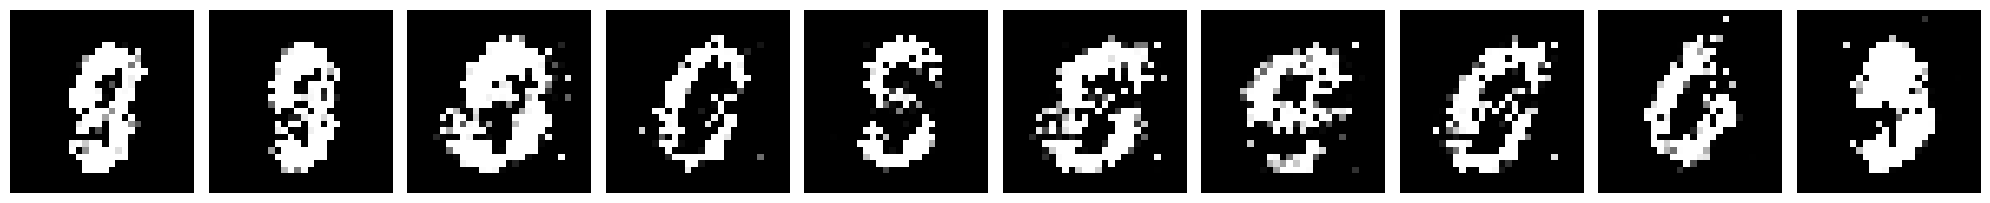

In [139]:
test_generator(generator, dim_latent) # 128

torch.Size([10, 1, 28, 28])
1.0 8.24528902096148e-30


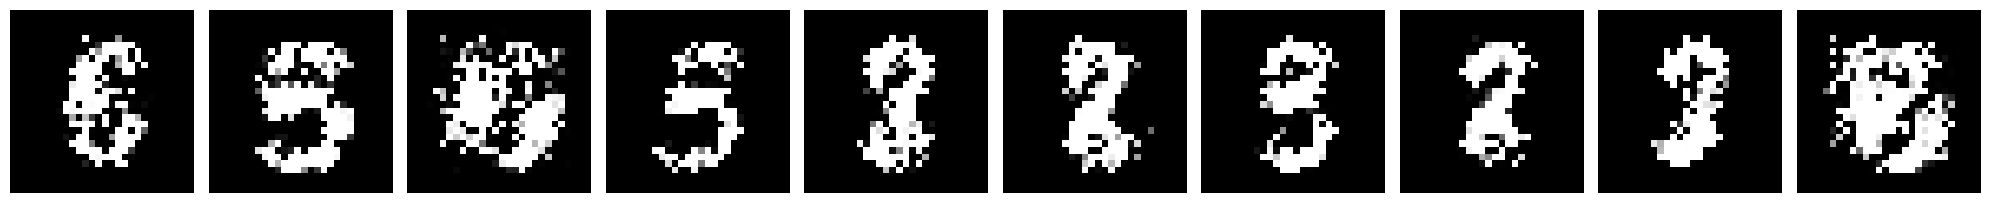

In [132]:
test_generator(generator, dim_latent) # 64

torch.Size([10, 1, 28, 28])
1.0 1.7451575375751834e-26


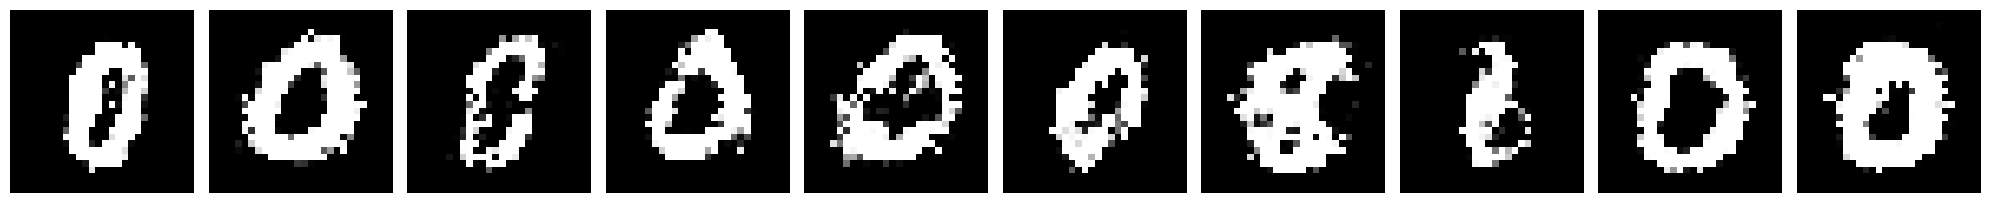

In [124]:
test_generator(generator, dim_latent) # 32

torch.Size([10, 1, 28, 28])
1.0 1.1434086015018969e-23


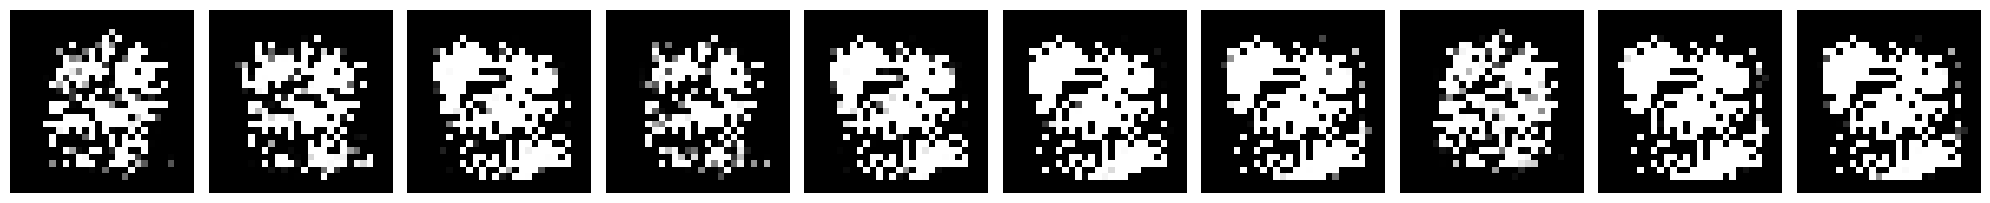

In [108]:
test_generator(generator, dim_latent) # 32

torch.Size([10, 1, 28, 28])
1.0 1.5671898324484866e-29


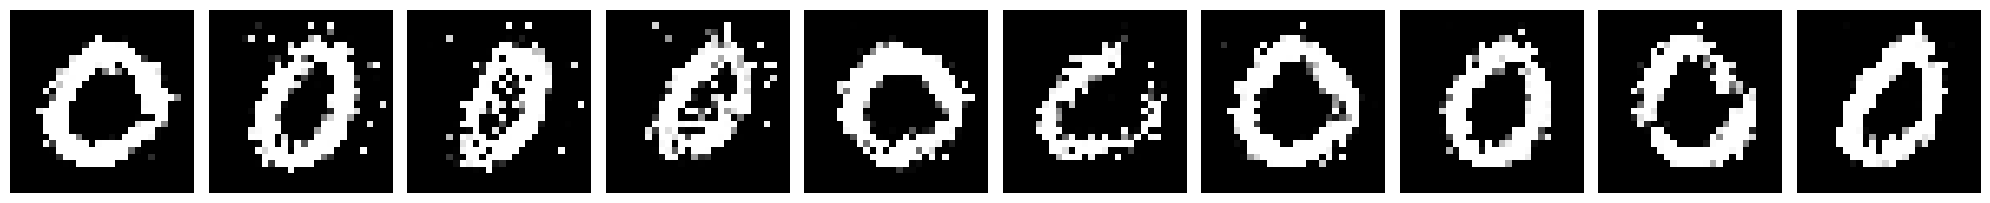

In [98]:
test_generator(generator, dim_latent)

torch.Size([10, 1, 28, 28])
1.0 2.2742548378353266e-28


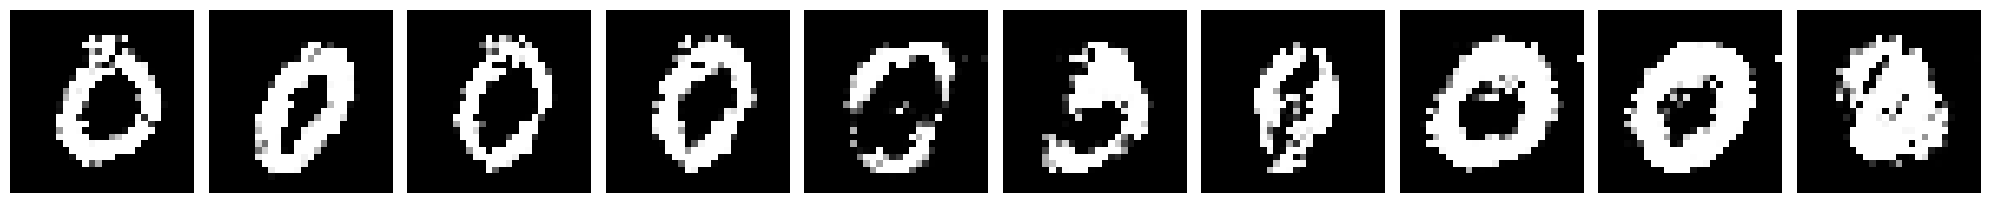

In [81]:
test_generator(generator, dim_latent)

torch.Size([10, 1, 28, 28])
1.0 5.6218294684015716e-24


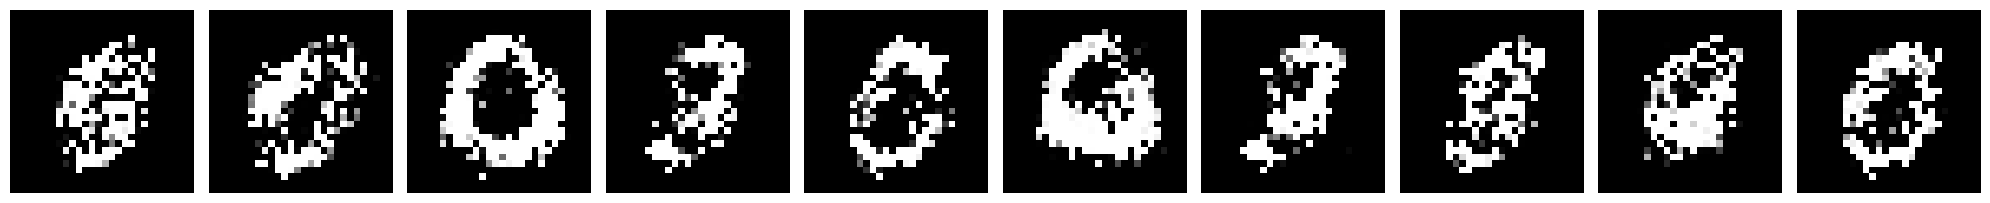

In [62]:
test_generator(generator, dim_latent)

torch.Size([10, 1, 28, 28])
1.0 7.218725935977528e-27


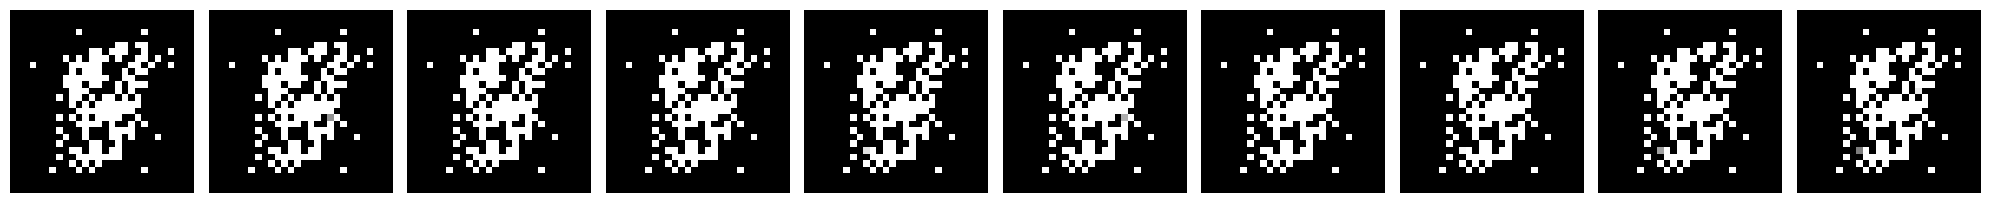

In [38]:
test_generator(generator, dim_latent)

torch.Size([10, 1, 28, 28])
1.0 5.388255249870187e-33


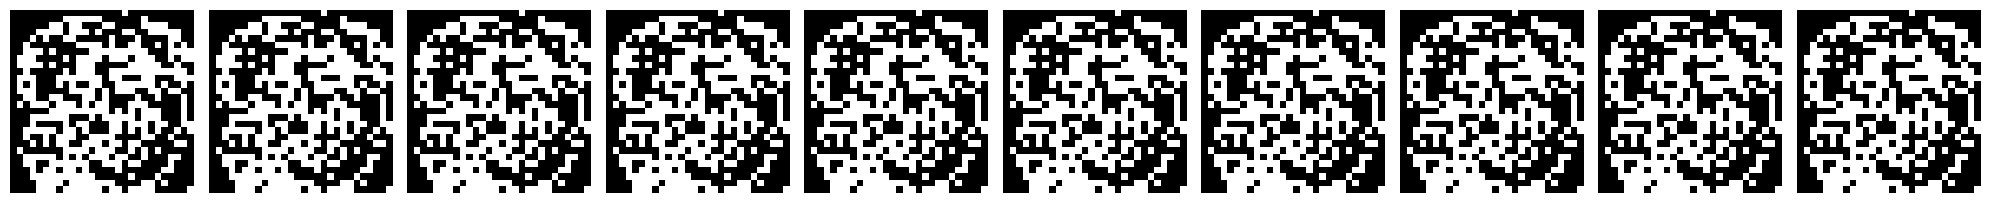

In [30]:
test_generator(generator, dim_latent)

torch.Size([10, 1, 28, 28])
1.0 2.341995940272044e-34


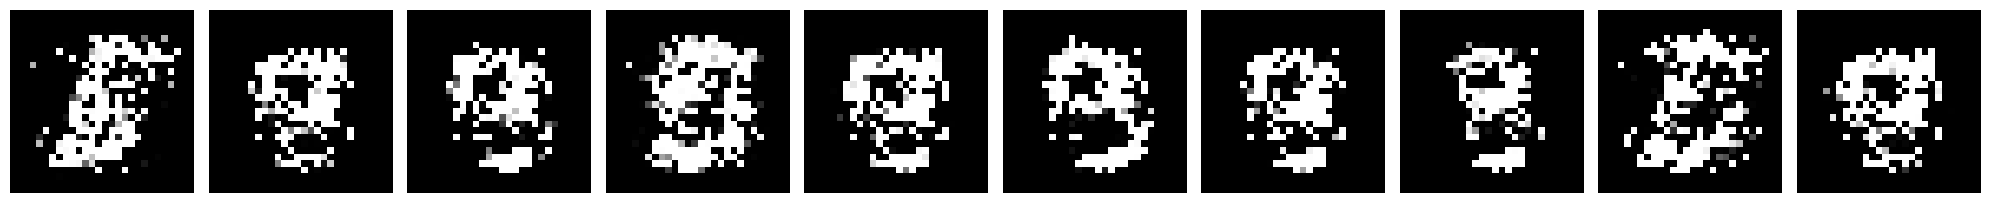

In [16]:
test_generator(generator, dim_latent)

torch.Size([10, 1, 28, 28])
1.0 1.8554422324994998e-28


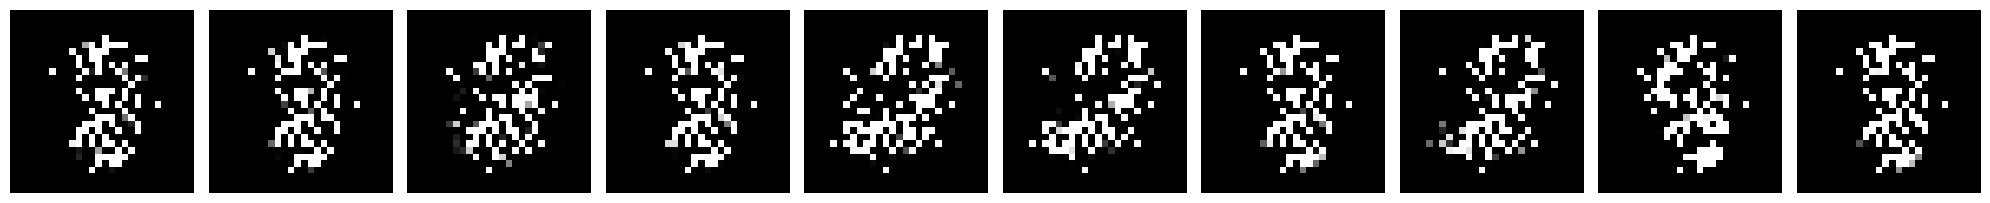

In [22]:
test_generator(generator, dim_latent)